# RETO-TEST PYTHON FOR DATA

In [113]:
import psycopg2
import pandas as pd
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
import plotly.express as px

In [114]:
conn = psycopg2.connect(host = "localhost", 
                        database = "postgres", # tablas de la databe northwind
                        user = "postgres", 
                        password = "admin")

La empresa ficticia "Global Importaciones" ha decidido implementar un sistema de
gestión de pedidos utilizando la base de datos Northwind como referencia. La
empresa se dedica a la importación y distribución de productos a nivel
internacional. Como analista de datos para la empresa internacional "Global
Importaciones", te enfrentas al desafío de extraer información clave de la base de
datos Northwind para optimizar la gestión de pedidos. La dirección ha solicitado
insights específicos para tomar decisiones informadas.
Para poder resolver este ejercicio primero, es necesario que instales la BBDD de
'Northwind' en Postgres/DBeaver, a continuación deberás generar una conexión
entre Python y Postgres/DBeaver para poder realizar los siguientes ejercicios.

## Ejercicio 1. Familiarizarse con la Base de Datos:

El primer paso como analista de datos es conocer la estructura y la información
básica de nuestra BBDD, Crea el esquema de northwind y observa con atención
las tablas que tiene y cómo están relacionadas entre sí.

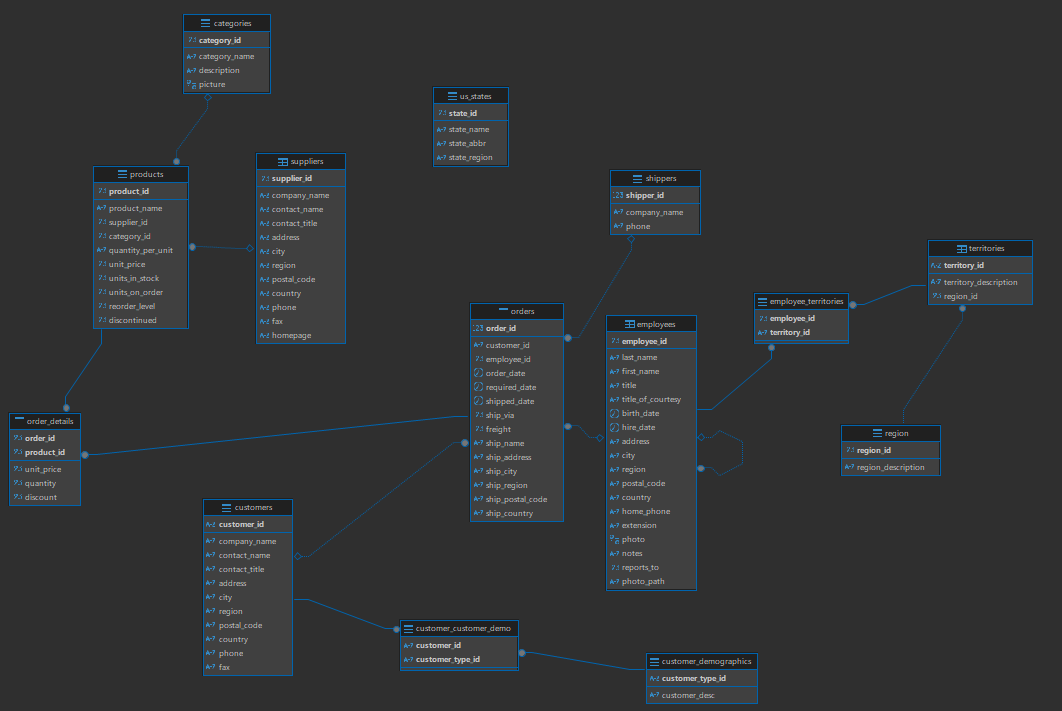

## Ejercicio 2. Primeras consultas

Ahora vamos a sacar información básica de nuestra BBDD, para ello tienes que
generar las Queries necesarias para responder a las siguientes preguntas:

¿Cuántos empleados tenemos contratados en 'Global Importaciones'? Indica
su id, nombre, apellido, ciudad y país.

In [115]:
sql_query = '''SELECT employee_id ,
                CONCAT(first_name,' ',last_name) AS "Empleado",
                City AS "Ciudad_Empleado", 
                Country AS "País_Empleado"
              FROM employees'''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
empleados = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
empleados = empleados.set_axis(colnames, axis = 1)
empleados

,employee_id,Empleado,Ciudad_Empleado,País_Empleado
0,1,Nancy Davolio,Seattle,USA
1,2,Andrew Fuller,Tacoma,USA
2,3,Janet Leverling,Kirkland,USA
3,4,Margaret Peacock,Redmond,USA
4,5,Steven Buchanan,London,UK
5,6,Michael Suyama,London,UK
6,7,Robert King,London,UK
7,8,Laura Callahan,Seattle,USA
8,9,Anne Dodsworth,London,UK


¿Qué productos tenemos? Indica el id del producto, id del proveedor, nombre
del producto, precio por unidad, unidades en stock, unidades pedidas al proveedor y productos descontinuados.

In [116]:
sql_query = '''SELECT Product_id ,
                      Product_name AS "Nombre_Producto",
                      Unit_price AS "Precio_Unidad", 
                      Units_in_stock AS "Unidades_Stock", 
                      Units_on_order AS "Unidades_Pedidas", 
                      Discontinued AS "Producto_Descontinuado"
              FROM products'''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
productos = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
productos = productos.set_axis(colnames, axis = 1)
productos

,product_id,Nombre_Producto,Precio_Unidad,Unidades_Stock,Unidades_Pedidas,Producto_Descontinuado
0,1,Chai,18.00,39,0,1
1,2,Chang,19.00,17,40,1
2,3,Aniseed Syrup,10.00,13,70,0
3,4,Chef Anton's Cajun Seasoning,22.00,53,0,0
4,5,Chef Anton's Gumbo Mix,21.35,0,0,1
...,...,...,...,...,...,...
72,73,Röd Kaviar,15.00,101,0,0
73,74,Longlife Tofu,10.00,4,20,0
74,75,Rhönbräu Klosterbier,7.75,125,0,0
75,76,Lakkalikööri,18.00,57,0,0


¿Tenemos productos descontinuados?. Indica el nombre del producto, y
cantidad que nos queda en stock. (El atributo Discontinued es un booleano: si
es igual a 1 el producto ha sido descontinuado.)

In [117]:
sql_query = '''SELECT Product_id ,
                      Product_name AS "Nombre_Producto", 
                      Units_in_stock AS "Unidades_Stock"
              FROM Products
              WHERE Discontinued = 1''' 
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
productos_disc = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
productos_disc = productos_disc.set_axis(colnames, axis = 1)
productos_disc

,product_id,Nombre_Producto,Unidades_Stock
0,1,Chai,39
1,2,Chang,17
2,5,Chef Anton's Gumbo Mix,0
3,9,Mishi Kobe Niku,29
4,17,Alice Mutton,0
5,24,Guaraná Fantástica,20
6,28,Rössle Sauerkraut,26
7,29,Thüringer Rostbratwurst,0
8,42,Singaporean Hokkien Fried Mee,26
9,53,Perth Pasties,0


¿Qué proveedores tenemos? Indica el id de la compañía, nombre de la
compañía, ciudad y país.

In [118]:
sql_query = '''SELECT Supplier_id AS "Id_Compañía",
                Company_name AS "Nombre_Compañia", 
                City AS "Ciudad", 
                Country AS "País"
               FROM suppliers '''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
proveedores = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
proveedores = proveedores.set_axis(colnames, axis = 1)
proveedores

,Id_Compañía,Nombre_Compañia,Ciudad,País
0,1,Exotic Liquids,London,UK
1,2,New Orleans Cajun Delights,New Orleans,USA
2,3,Grandma Kelly's Homestead,Ann Arbor,USA
3,4,Tokyo Traders,Tokyo,Japan
4,5,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain
5,6,Mayumi's,Osaka,Japan
6,7,"Pavlova, Ltd.",Melbourne,Australia
7,8,"Specialty Biscuits, Ltd.",Manchester,UK
8,9,PB Knäckebröd AB,Göteborg,Sweden
9,10,Refrescos Americanas LTDA,Sao Paulo,Brazil


¿Qué pedidos hemos tenido? Indica el número de pedido, id del cliente,id del
transportista, dia del pedido, día requerido de llegada y día de llegada real.

In [119]:
sql_query = '''SELECT Order_id AS "Nº_pedido", 
                      Customer_id AS "Id_Cliente", 
                      Ship_via AS "id_transporte", 
                      Order_date AS "Día_pedido", 
                      Required_date AS "Llegada_requerida", 
                      Shipped_date AS "Llegada_real"
               FROM orders '''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
pedidos = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
pedidos = pedidos.set_axis(colnames, axis = 1)
pedidos

,Nº_pedido,Id_Cliente,id_transporte,Día_pedido,Llegada_requerida,Llegada_real
0,10248,VINET,3,1996-07-04,1996-08-01,1996-07-16
1,10249,TOMSP,1,1996-07-05,1996-08-16,1996-07-10
2,10250,HANAR,2,1996-07-08,1996-08-05,1996-07-12
3,10251,VICTE,1,1996-07-08,1996-08-05,1996-07-15
4,10252,SUPRD,2,1996-07-09,1996-08-06,1996-07-11
...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,None
826,11074,SIMOB,2,1998-05-06,1998-06-03,None
827,11075,RICSU,2,1998-05-06,1998-06-03,None
828,11076,BONAP,2,1998-05-06,1998-06-03,None


¿Cuántos pedidos hemos tenido?

In [120]:
sql_query = '''SELECT COUNT(DISTINCT order_id) AS "Nº_pedidos_totales"
               FROM orders '''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
pedidos_tot = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
pedidos_tot.set_axis(colnames, axis = 1)

,Nº_pedidos_totales
0,830


¿Cuántos clientes tenemos? Indica el id del cliente, nombre de la compañía,
ciudad y país.

In [121]:
sql_query = '''SELECT Customer_id AS "Id_Cliente", 
                      Company_name AS "Compañía",
                      City AS "Ciudad",
                      Country AS "País"
              FROM customers'''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
clientes = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
clientes = clientes.set_axis(colnames, axis = 1)
clientes

,Id_Cliente,Compañía,Ciudad,País
0,ALFKI,Alfreds Futterkiste,Berlin,Germany
1,ANATR,Ana Trujillo Emparedados y helados,México D.F.,Mexico
2,ANTON,Antonio Moreno Taquería,México D.F.,Mexico
3,AROUT,Around the Horn,London,UK
4,BERGS,Berglunds snabbköp,Luleå,Sweden
...,...,...,...,...
86,WARTH,Wartian Herkku,Oulu,Finland
87,WELLI,Wellington Importadora,Resende,Brazil
88,WHITC,White Clover Markets,Seattle,USA
89,WILMK,Wilman Kala,Helsinki,Finland


¿Con qué empresas de transporte trabajamos? Indica su id del transportista y
el nombre de la compañía.

In [122]:
sql_query = '''SELECT Shipper_id AS "Id_Transporte", 
                      Company_name AS "Nombre_Compañía"
               FROM shippers '''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
transportistas = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
transportistas = transportistas.set_axis(colnames, axis = 1)
transportistas

,Id_Transporte,Nombre_Compañía
0,1,Speedy Express
1,2,United Package
2,3,Federal Shipping
3,4,Alliance Shippers
4,5,UPS
5,6,DHL


¿Cómo son las relaciones de reporte de resultados entre los empleados?

In [123]:
sql_query = '''SELECT Employee_id AS "Id_Empleado",
                      CONCAT(First_name,' ',last_name) AS "Empleado", 
                      Reports_to AS "Reporta_a"
               FROM employees '''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
empleados_report = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
empleados_report = empleados_report.set_axis(colnames, axis = 1)
empleados_report

,Id_Empleado,Empleado,Reporta_a
0,1,Nancy Davolio,2.0
1,2,Andrew Fuller,NaN
2,3,Janet Leverling,2.0
3,4,Margaret Peacock,2.0
4,5,Steven Buchanan,2.0
5,6,Michael Suyama,5.0
6,7,Robert King,5.0
7,8,Laura Callahan,2.0
8,9,Anne Dodsworth,5.0


## Ejercicio 3. Análisis de la empresa

Vamos a crear un par de DataFrames uno con la información de las tablas de
pedidos y clientes y otro con la información de productos, proveedores y detalles
de los pedidos para poder hacer un estudio de la evolución de nuestra empresa y
qué cosas podemos mejorar de esta.

In [ ]:
#DF_1 pedidos + clientes
sql_query = '''SELECT o.order_id AS "Nº_Pedido",
                      o.ship_via AS "Id_Transporte",
                      o.order_date AS "Día_Pedido", 
                      o.required_date AS "Llegada_Requerida", 
                      o.shipped_date AS "Llegada_Real", 
                      c.customer_id AS "Id_Cliente", 
                      c.company_name AS "Compañía_Clientes", 
                      c.city AS "Ciudad_Cliente", 
                      c.country AS "País_Cliente"
              FROM customers AS c
              FULL JOIN orders AS o
              ON c.customer_id = o.customer_id'''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
cliente_pedidos = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
cliente_pedidos = cliente_pedidos.set_axis(colnames, axis = 1)
cliente_pedidos

,Nº_Pedido,Id_Transporte,Día_Pedido,Llegada_Requerida,Llegada_Real,Id_Cliente,Compañía_Clientes,Ciudad_Cliente,País_Cliente
0,10248.0,3.0,1996-07-04,1996-08-01,1996-07-16,VINET,Vins et alcools Chevalier,Reims,France
1,10249.0,1.0,1996-07-05,1996-08-16,1996-07-10,TOMSP,Toms Spezialitäten,Münster,Germany
2,10250.0,2.0,1996-07-08,1996-08-05,1996-07-12,HANAR,Hanari Carnes,Rio de Janeiro,Brazil
3,10251.0,1.0,1996-07-08,1996-08-05,1996-07-15,VICTE,Victuailles en stock,Lyon,France
4,10252.0,2.0,1996-07-09,1996-08-06,1996-07-11,SUPRD,Suprêmes délices,Charleroi,Belgium
...,...,...,...,...,...,...,...,...,...
827,11075.0,2.0,1998-05-06,1998-06-03,None,RICSU,Richter Supermarkt,Genève,Switzerland
828,11076.0,2.0,1998-05-06,1998-06-03,None,BONAP,Bon app',Marseille,France
829,11077.0,2.0,1998-05-06,1998-06-03,None,RATTC,Rattlesnake Canyon Grocery,Albuquerque,USA
830,NaN,NaN,None,None,None,PARIS,Paris spécialités,Paris,France


In [130]:
#DF_2 productos, proveedores y detalles de los pedidos
sql_query = '''SELECT p.product_id AS "Id_Producto",
                      p.product_name AS "Nombre_Producto",
                      p.unit_price AS "Precio_Unidad", 
                      p.units_in_stock AS "Unidades_Stock", 
                      p.units_on_order AS "Unidades_Pedidas", 
                      p.discontinued AS "Producto_Descontinuado", 
                      s.supplier_id AS "Id_Proveedor",
                      s.company_name AS "Nombre_Proveedor", 
                      s.city AS "Ciudad_Proveedor", 
                      s.country AS "País_Proveedor",
                      od.order_id AS "Nº_Pedido", 
                      od.unit_price AS "Precio_Unidad", 
                      od.quantity AS "Cantidad", 
                      od.discount AS "Descuento"
              FROM products AS p
              FULL JOIN suppliers AS s
              ON p.supplier_id = s.supplier_id
              FULL JOIN order_details AS od
              ON od.product_id = p.product_id '''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
produc_provee_deta = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
produc_provee_deta = produc_provee_deta.set_axis(colnames, axis = 1)
produc_provee_deta

,Id_Producto,Nombre_Producto,Precio_Unidad,Unidades_Stock,Unidades_Pedidas,Producto_Descontinuado,Id_Proveedor,Nombre_Proveedor,Ciudad_Proveedor,País_Proveedor,Nº_Pedido,Precio_Unidad,Cantidad,Descuento
0,11,Queso Cabrales,21.00,22,30,0,5,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,10248,14.00,12,0.00
1,42,Singaporean Hokkien Fried Mee,14.00,26,0,1,20,Leka Trading,Singapore,Singapore,10248,9.80,10,0.00
2,72,Mozzarella di Giovanni,34.80,14,0,0,14,Formaggi Fortini s.r.l.,Ravenna,Italy,10248,34.80,5,0.00
3,14,Tofu,23.25,35,0,0,6,Mayumi's,Osaka,Japan,10249,18.60,9,0.00
4,51,Manjimup Dried Apples,53.00,20,0,0,24,"G'day, Mate",Sydney,Australia,10249,42.40,40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,64,Wimmers gute Semmelknödel,33.25,22,80,0,12,Plutzer Lebensmittelgroßmärkte AG,Frankfurt,Germany,11077,33.25,2,0.03
2151,66,Louisiana Hot Spiced Okra,17.00,4,100,0,2,New Orleans Cajun Delights,New Orleans,USA,11077,17.00,1,0.00
2152,73,Röd Kaviar,15.00,101,0,0,17,Svensk Sjöföda AB,Stockholm,Sweden,11077,15.00,2,0.01
2153,75,Rhönbräu Klosterbier,7.75,125,0,0,12,Plutzer Lebensmittelgroßmärkte AG,Frankfurt,Germany,11077,7.75,4,0.00


- Haz un estudio de la evolución de los pedidos realizados a lo largo del tiempo.
Para ello primero realiza la query necesaria para obtener los meses, años y
pedidos durante cada mes. A continuación crea una línea temporal para ver
dicha evolución

In [124]:
sql_query = '''SELECT EXTRACT(MONTH FROM "order_date") AS "Mes",
                      EXTRACT(YEAR FROM "order_date") AS "Año", 
                      COUNT(DISTINCT "order_id") AS "Pedidos_Mes"
              FROM orders
              GROUP BY "Mes", "Año"
              ORDER BY "Mes", "Año"'''
cursor = conn.cursor()
cursor.execute(sql_query)
rows = cursor.fetchall()
pedidos_tiempo = pd.DataFrame(rows)
colnames = [desc[0] for desc in cursor.description]
pedidos_tiempo = pedidos_tiempo.set_axis(colnames, axis = 1)
pedidos_tiempo

,Mes,Año,Pedidos_Mes
0,1,1997,33
1,1,1998,55
2,2,1997,29
3,2,1998,54
4,3,1997,30
5,3,1998,73
6,4,1997,31
7,4,1998,74
8,5,1997,32
9,5,1998,14


In [131]:
pedidos_tiempo['Fecha'] = pd.to_datetime({'year':pedidos_tiempo['Año'], 'month':pedidos_tiempo['Mes'],'day':1})
pedidos_tiempo.sort_values(by = 'Fecha',inplace = True)

In [132]:
#linea temporal
fig = px.line(pedidos_tiempo, 
							x = 'Fecha', 
							y = 'Pedidos_Mes', 
							text = 'Pedidos_Mes',
							)
fig.update_traces(textposition = "top center")
fig.update_layout(title = dict(text = "Pedidos realizados a lo largo del tiempo", 
															 font = dict(size = 30),
															 automargin = True, 
															 yref = 'paper',
															 x = 0.2,
															 y = 1),
							    legend = dict(yanchor = "top",
														    y = 0.99,
														    xanchor = "right",
														    x = 0.75))
fig.show()

- Investiga cuáles son los países donde tenemos más ventas (País origen de la
compañía). No es necesario realizar una query para obtener el DataFrame. A
raíz de estos datos genera una columna con el continente a partir del
siguiente diccionario: